In [1]:
import numpy as np
import matplotlib.pyplot as plt
from codes.model import Model
from codes.solvers import solver
from codes import kwant_examples
from codes.kwant_helper import utils
from codes.tb.transforms import tb2kfunc, tb2kfunc
from codes.tb.tb import addTb

In [2]:
# Create translationally-invariant `kwant.Builder`
graphene_builder, int_builder = kwant_examples.graphene_extended_hubbard()
tb_model = utils.builder2tb_model(graphene_builder)

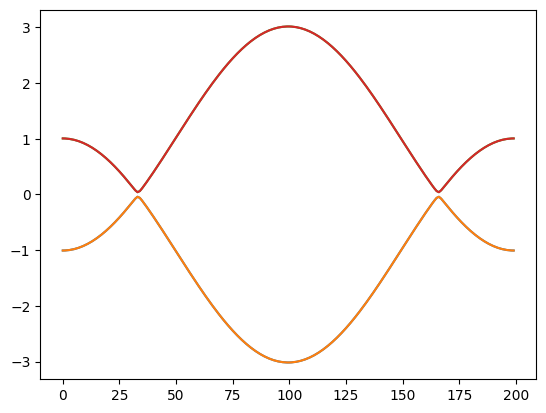

In [12]:
params = dict(U=2.31, V=0.02)
filling = 2 

int_model = utils.builder2tb_model(int_builder, params)
model = Model(tb_model, int_model, filling)
mf_guess = utils.generate_guess(frozenset(int_model), len(list(tb_model.values())[0]))
mf_sol = solver(model, mf_guess, nK=20)

ks = np.linspace(-np.pi, np.pi, 200)
hkfunc = tb2kfunc(addTb(tb_model, mf_sol))
hkarray = np.array([hkfunc((kx, -kx)) for kx in ks])
vals = np.linalg.eigvalsh(hkarray)
plt.plot(vals)